In [57]:
import os
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier

df = pd.read_csv('data.tsv',sep='\t')

In [58]:
#print(df.count(0))
#print(df.shape)
#print(df.size)
#print(df.info)

In [59]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
Y_range = df['y'].unique()
#print(X,Y)
print("X shape={}".format(X.shape))
print("Y shape={}".format(Y.shape))
print(df['y'].unique())

X shape=(18000, 25)
Y shape=(18000,)
[4 1 2 0 3]


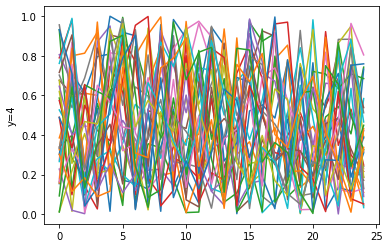

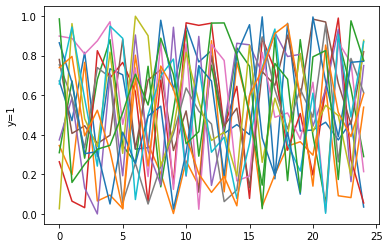

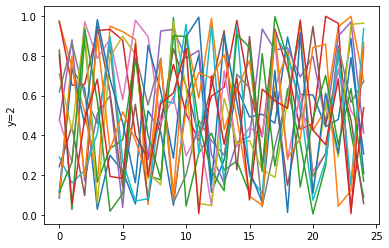

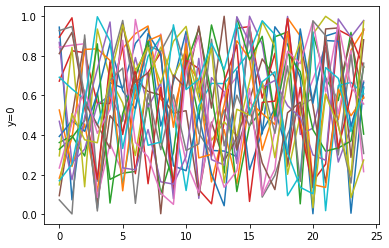

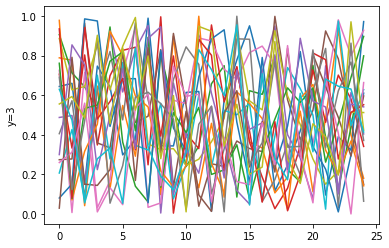

In [60]:
X = X.values
Y = Y.values

for i in range (0,100):
    for j in (Y_range):
        if Y[i] == j:
            pyplot.figure(j)
            pyplot.ylabel("y={}".format(j))
            pyplot.plot(X[i])
        

In [61]:
trainX, testX, trainy, testy = train_test_split(X, Y, test_size=0.3, random_state=0)

print(trainX.shape,trainy.shape)
print(testX.shape, testy.shape)

(12600, 25) (12600,)
(5400, 25) (5400,)


LR 59.648%
KNN 44.389%
CART 33.759%
SVM 66.463%
RF 55.556%
MLP 87.852%


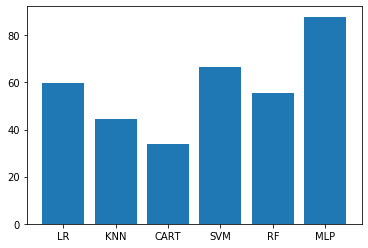

In [62]:
# create a list of models to evaluate
models, names = list(), list()
# logistic
models.append(LogisticRegression())
names.append('LR')
# knn
models.append(KNeighborsClassifier())
names.append('KNN')
# cart
models.append(DecisionTreeClassifier())
names.append('CART')
# svm
models.append(SVC())
names.append('SVM')
# random forest
models.append(RandomForestClassifier())
names.append('RF')
#MLP Classifier
models.append(MLPClassifier(max_iter=500,activation='relu',alpha=0.05,hidden_layer_sizes=(10,30,10),learning_rate='constant',solver='adam'))
names.append('MLP')
# gbm
#models.append(GradientBoostingClassifier())
#names.append('GBM')

#models.append(VotingClassifier(estimators=[('MLP', MLPClassifier()), ('SVM', SVC())], voting='hard'))
#names.append('VC')

# evaluate models
all_scores = list()
for i in range(len(models)):
    # create a pipeline for the model
    scaler = StandardScaler()
    model = Pipeline(steps=[('s',scaler), ('m',models[i])])
    #model = models[i]
    # fit model = models[i]
    model.fit(trainX, trainy)
    # predict
    yhat = model.predict(testX)
    # evaluate
    score = accuracy_score(testy, yhat) * 100
    all_scores.append(score)
    # summarize
    print('%s %.3f%%' % (names[i], score))
    
    with open("{}.pickle".format(names[i]),"wb") as f:
        pickle.dump(model,f)
        
# plot
pyplot.bar(names, all_scores)
pyplot.show()

In [68]:
from sklearn.model_selection import cross_val_score
import time

# create a list of models to evaluate
models, names = list(), list()
## logistic
#models.append(LogisticRegression())
#names.append('LR')
## knn
#models.append(KNeighborsClassifier())
#names.append('KNN')
## cart
#models.append(DecisionTreeClassifier())
#names.append('CART')
## svm
#models.append(SVC())
#names.append('SVM')
## random forest
#models.append(RandomForestClassifier())
#names.append('RF')
#MLP Classifier
models.append(MLPClassifier(hidden_layer_sizes=(10,30,10),max_iter=1000,activation='relu',alpha=0.05,learning_rate='constant',solver='adam'))
names.append('MLP')
# gbm
#models.append(GradientBoostingClassifier())
#names.append('GBM')

#models.append(VotingClassifier(estimators=[('MLP', MLPClassifier()), ('SVM', SVC())], voting='hard'))
#names.append('VC')

# evaluate models
all_scores = list()

for i in range(len(models)):
    start = time.process_time()
    scaler = StandardScaler()
    model = Pipeline(steps=[('s',scaler), ('m',models[i])])
    scores = cross_val_score(model, X, Y, cv=3)
    print(names[i],"Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2),"\tTime Taken: %0.2f sec" % (time.process_time() - start))

MLP Accuracy: 0.89 (+/- 0.00) 	Time Taken: 101.09 sec


# Hyperparameter Tuning

In [ ]:
#from sklearn.model_selection import GridSearchCV
#def warn(*args, **kwargs): pass
#import warnings
#warnings.warn = warn
#
## Set the parameters by cross-validation
##SVM param
##tuned_parameters = [{'kernel': ['rbf','sigmoid','linear'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],'C': [0.001, 0.10, 0.1, 10]}]
#
##logistic regression param
##tuned_parameters=[{'penalty':['l1', 'l2','elasticnet'],'C': [0.001, 0.10, 0.1, 10],'solver':['lbfgs','liblinear','saga']}]
#
##Random forest param
##tuned_parameters=[{'n_estimators':list(range(10,101,10)),'max_features':list(range(6,32,5))}]
#
##MLP param
#tuned_parameters=parameter_space = [{'hidden_layer_sizes': [(30,30,30),(10,30,10)],
#                                     'activation': ['relu'],
#                                     'solver': ['adam'],
#                                     'alpha': [0.05],
#                                     'learning_rate': ['constant'],}]
#
##scores = ['precision', 'recall']
#scores = ['precision']
#
#for score in scores:
#    print("# Tuning hyper-parameters for %s" % score)
#    print()
#
#    clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5,scoring='%s_macro' % score)
#    clf.fit(X, Y)
#
#    print("Best parameters set found on development set:")
#    print()
#    print(clf.best_params_)
#    print()
#    print("Grid scores on development set:")
#    print()
#    means = clf.cv_results_['mean_test_score']
#    stds = clf.cv_results_['std_test_score']
#    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#        print("%0.3f (+/-%0.03f) for %r"
#              % (mean, std * 2, params))
#    print()